## Waterhackweek cyberseminar
# Workflows for gridded climate datasets
## Diana Gergel and Bart Nijssen
### University of Washington
### February 14, 2019

**Abstract:** Climate change, forecasting, satellite datasets, large model ensembles ... Large gridded datasets are everywhere in hydrology and earth science. While accessing and analyzing these datasets required some serious programming skills not so long ago, a number of toolkits are now available that let you easily access, ingest, analyze and display gridded climate datasets. In this webinar we’ll discuss one of the most common file formats used in our field for large data sets, the Network Common Data Format (NetCDF), and step through a Jupyter notebook to showcase python packages, such as xarray and cartopy, that can be used to examine them. No prior experience required, although we will build on some of the skills you have acquired in earlier webinars in the series.

## GitHub repository

The GitHub repository for this presentation can be found at: https://github.com/bartnijssen/gridded_data

The README.md file in this repository explains how to configure the environment you need to run the sample notebooks.

## Outline

* `gridded_data_1_background.ipynb`


* `gridded_data_2_xarray_and_dask.ipynb` (this notebook)


* `gridded_data_3_cartopy_and_seaborn.ipynb`


* `gridded_data_4_rasterio.ipynb`

## Data 

For this and the following section, we'll be using output from two climate modeling ensembles, the Community Earth System Model (CESM) Large Ensemble (http://www.cesm.ucar.edu/projects/community-projects/LENS/) and the Low Warming Ensemble (http://www.cesm.ucar.edu/experiments/1.5-2.0-targets.html). If you get really excited about working with the data, it is all publicly available (plus lots more) through the NCAR Climate Data Gateway (https://www.earthsystemgrid.org/). 

We'll be looking at the output variable `TBOT`, which represents the temperature at the bottom level of the atmosphere (at the land surface), for one ensemble member. There are two data files, one for 1850-2005 from the CESM Large Ensemble, and one for 1.5 degrees C of global-mean warming from 2005-2100. 

## Exploring the Data

We'll start off with using __`xarray`__ to explore the data. 

Let's load some packages that we'll need to use. 

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np 
import os 
import matplotlib.pyplot as plt

__Loading the data__

In [2]:
tbot_hist = xr.open_dataset(os.path.join('/Users/diana/Dropbox/UW/Research/applications/gridded_data', 
                                         'b.e11.B20TRC5CNBDRD.f09_g16.001.clm2.h0.TBOT.185001-200512.nc'))

__Now let's see what the file looks like:__ 

In [3]:
tbot_hist 

<xarray.Dataset>
Dimensions:       (hist_interval: 2, lat: 192, levgrnd: 15, levlak: 10, lon: 288, time: 1872)
Coordinates:
  * lat           (lat) float32 -90.0 -89.057594 -88.11518 -87.172775 ...
  * levgrnd       (levgrnd) float32 0.007100635 0.027925 0.062258575 ...
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 8.1 12.6 18.6 25.6 ...
  * lon           (lon) float32 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 ...
  * time          (time) datetime64[ns] 1850-02-01 1850-03-01 1850-04-01 ...
Dimensions without coordinates: hist_interval
Data variables:
    BSW           (levgrnd, lat, lon) float32 ...
    DZSOI         (levgrnd, lat, lon) float32 ...
    HKSAT         (levgrnd, lat, lon) float32 ...
    SUCSAT        (levgrnd, lat, lon) float32 ...
    TBOT          (time, lat, lon) float32 ...
    WATSAT        (levgrnd, lat, lon) float32 ...
    ZSOI          (levgrnd, lat, lon) float32 ...
    area          (lat, lon) float32 ...
    date_written  (time) |S8 ...
    landfrac     

__If we just want to look at the data_variables, we can do that like this:__

In [4]:
tbot_hist.data_vars

Data variables:
    BSW           (levgrnd, lat, lon) float32 ...
    DZSOI         (levgrnd, lat, lon) float32 ...
    HKSAT         (levgrnd, lat, lon) float32 ...
    SUCSAT        (levgrnd, lat, lon) float32 ...
    TBOT          (time, lat, lon) float32 ...
    WATSAT        (levgrnd, lat, lon) float32 ...
    ZSOI          (levgrnd, lat, lon) float32 ...
    area          (lat, lon) float32 ...
    date_written  (time) |S8 ...
    landfrac      (lat, lon) float32 ...
    landmask      (lat, lon) float64 ...
    mcdate        (time) int32 ...
    mcsec         (time) int32 ...
    mdcur         (time) int32 ...
    mscur         (time) int32 ...
    nstep         (time) int32 ...
    pftmask       (lat, lon) float64 ...
    time_bounds   (time, hist_interval) float64 ...
    time_written  (time) |S8 ...
    topo          (lat, lon) float32 ...

__Now let's look at the variable we care about, `TBOT`:__

In [5]:
tbot_hist['TBOT']

<xarray.DataArray 'TBOT' (time: 1872, lat: 192, lon: 288)>
[103514112 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -90.0 -89.057594 -88.11518 -87.172775 -86.23037 ...
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 11.25 ...
  * time     (time) datetime64[ns] 1850-02-01 1850-03-01 1850-04-01 ...
Attributes:
    long_name:     atmospheric air temperature
    units:         K
    cell_methods:  time: mean

__Now that we have extracted `TBOT`, it's now a `DataArray` rather than a `DataSet` as before.__

__Let's take a look at the time attribute.__

In [6]:
print(tbot_hist['TBOT'].time[0].values)
print(tbot_hist['TBOT'].time[-1].values)
tbot_hist['TBOT'].time[:13]

1850-02-01T00:00:00.000000000
2006-01-01T00:00:00.000000000


<xarray.DataArray 'time' (time: 13)>
array(['1850-02-01T00:00:00.000000000', '1850-03-01T00:00:00.000000000',
       '1850-04-01T00:00:00.000000000', '1850-05-01T00:00:00.000000000',
       '1850-06-01T00:00:00.000000000', '1850-07-01T00:00:00.000000000',
       '1850-08-01T00:00:00.000000000', '1850-09-01T00:00:00.000000000',
       '1850-10-01T00:00:00.000000000', '1850-11-01T00:00:00.000000000',
       '1850-12-01T00:00:00.000000000', '1851-01-01T00:00:00.000000000',
       '1851-02-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1850-02-01 1850-03-01 1850-04-01 ...
Attributes:
    long_name:  time
    bounds:     time_bounds

__If we want to extract the values from the time attribute as a `numpy` array, we can do:__ 

In [7]:
tbot_hist['TBOT'].time[:13].values 

array(['1850-02-01T00:00:00.000000000', '1850-03-01T00:00:00.000000000',
       '1850-04-01T00:00:00.000000000', '1850-05-01T00:00:00.000000000',
       '1850-06-01T00:00:00.000000000', '1850-07-01T00:00:00.000000000',
       '1850-08-01T00:00:00.000000000', '1850-09-01T00:00:00.000000000',
       '1850-10-01T00:00:00.000000000', '1850-11-01T00:00:00.000000000',
       '1850-12-01T00:00:00.000000000', '1851-01-01T00:00:00.000000000',
       '1851-02-01T00:00:00.000000000'], dtype='datetime64[ns]')

__Now if we want to calculate some means:__

__For an annual mean of `TBOT`:__

In [8]:
tbot_hist_ann_mean = tbot_hist['TBOT'].mean('time')

__Now let's look at the annual mean globally:__

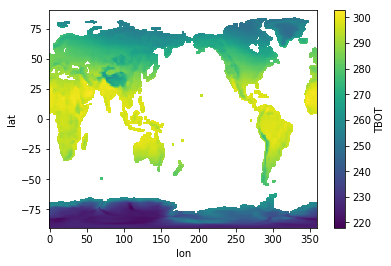

In [9]:
tbot_hist_ann_mean.plot()

__If we want our plot to look a little prettier (and since we don't think in Kelvin, let's change our units to Celsius):__

([], <a list of 0 Text yticklabel objects>)

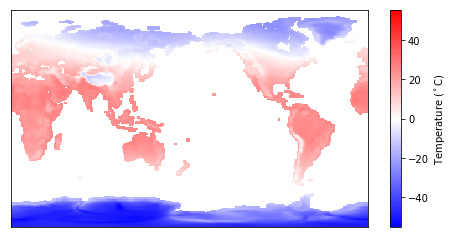

In [10]:
KtoC = 273.15
plt.figure(figsize=(8, 4))
(tbot_hist_ann_mean - KtoC).plot(add_labels=False, 
                                 cbar_kwargs={'label': 'Temperature ($^\circ$C)'}, 
                                 cmap='bwr')
plt.xticks([])
plt.yticks([])

__Now let's look at some seasonal means:__

In [11]:
tbot_hist_seas_mean = tbot_hist['TBOT'].groupby('time.season').mean('time') - KtoC

In [12]:
tbot_hist_seas_mean.dims

('season', 'lat', 'lon')

In [13]:
tbot_hist_seas_mean.season

<xarray.DataArray 'season' (season: 4)>
array(['DJF', 'JJA', 'MAM', 'SON'], dtype=object)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

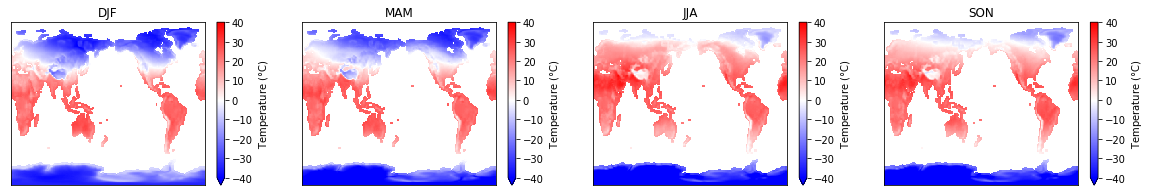

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(20, 3))

# constrain colorbar
vmin = -40
vmax = 40

tbot_hist_seas_mean.sel(season='DJF').plot(ax=axes[0], add_labels=False, 
                                           cbar_kwargs={'label': 'Temperature ($\degree$C)'}, 
                                           cmap='bwr', 
                                           vmin=vmin, vmax=vmax)

axes[0].set_title('DJF')

tbot_hist_seas_mean.sel(season='MAM').plot(ax=axes[1], 
                                      add_labels=False, 
                                      cbar_kwargs={'label': 'Temperature ($\degree$C)'}, 
                                      cmap='bwr', 
                                      vmin=vmin, vmax=vmax)
axes[1].set_title('MAM')
tbot_hist_seas_mean.sel(season='JJA').plot(ax=axes[2], 
                                      add_labels=False, 
                                      cbar_kwargs={'label': 'Temperature ($\degree$C)'}, 
                                      cmap='bwr', 
                                      vmin=vmin, vmax=vmax)
axes[2].set_title('JJA')
tbot_hist_seas_mean.sel(season='SON').plot(ax=axes[3], 
                                      add_labels=False, 
                                      cbar_kwargs={'label': 'Temperature ($\degree$C)'}, 
                                      cmap='bwr', 
                                      vmin=vmin, vmax=vmax)
axes[3].set_title('SON')

# turn off axis numbers (they don't add any information to the figures)
for fig_ax_num in np.arange(len(axes)):
    axes[fig_ax_num].set_xticks([])
    axes[fig_ax_num].set_yticks([])

__What if we just want to look at the most recent 30 years of the data?__

([], <a list of 0 Text yticklabel objects>)

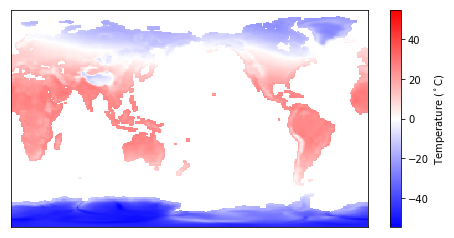

In [17]:
plt.figure(figsize=(8, 4))
(tbot_hist['TBOT'].sel(time=slice('1975-09-01', '2005-08-31')).mean('time') - KtoC).plot(add_labels=False, 
                                                                                         cbar_kwargs={'label': 'Temperature ($^\circ$C)'}, 
                                                                                         cmap='bwr')
plt.xticks([])
plt.yticks([])

__Now what if we also want to look at some more recent data? The previous file only went through 2005, and maybe we want to understand how the climate is projected to warm. Here we'll also load another file, the 2006-2100 `TBOT` file from the Low Warming Ensemble.__

__We can load it in as we did the previous file:__

In [18]:
tbot_future = xr.open_dataset(os.path.join('/Users/diana/Dropbox/UW/Research/applications/gridded_data', 
                                         'b.e11.BRCP26C5CNBDRD.f09_g16.1pt5degC.001.clm2.h0.TBOT.200601-210012.nc'))

__Or we can load both files in at the same time and concatenate them using `dask`.__

In [19]:
tbot = xr.open_mfdataset(os.path.join('/Users/diana/Dropbox/UW/Research/applications/gridded_data', 
                                      'b.e11*'), concat_dim='time')

__In this step, `dask` is looking for all files with the prefix `b.e11` (called a wildcard) in the specified directory and then concatenating them together on the `time` dimension into one DataSet.__

__We can see from looking at the time dimension that the full time record is now in one DataSet.__

In [24]:
print(tbot.time[0].values)
print(tbot.time[-1].values)

1850-02-01T00:00:00.000000000
2101-01-01T00:00:00.000000000


__So now if we want to compare JJA temperatures from two different time periods, it's very straightforward:__

In [29]:
tbot_hist_clim = tbot['TBOT'].sel(time=slice('1975-09-01', '2005-08-31')
                                 ).groupby('time.season').mean('time')
tbot_future_clim = tbot['TBOT'].sel(time=slice('2070-09-01', '2099-08-31')
                                   ).groupby('time.season').mean('time')

/Users/diana/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


([], <a list of 0 Text yticklabel objects>)

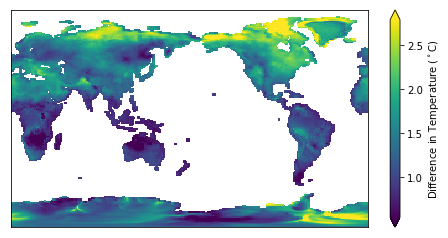

In [30]:
plt.figure(figsize=(8, 4))

tbot_difference_jja = (tbot_future_clim.sel(season='JJA') - tbot_hist_clim.sel(season='JJA'))

tbot_difference_jja.plot(add_labels=False, 
                     cbar_kwargs={'label': 'Difference in Temperature ($^\circ$C)'}, 
                     cmap='viridis', 
                     robust=True)
plt.xticks([])
plt.yticks([])

__Or winter temperature (DJF):__

/Users/diana/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


([], <a list of 0 Text yticklabel objects>)

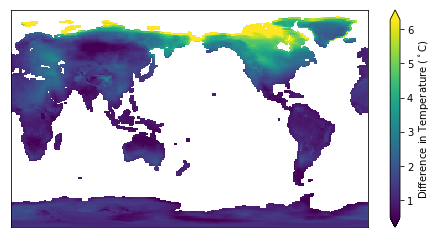

In [31]:
plt.figure(figsize=(8, 4))

season = 'DJF'

tbot_difference_djf = (tbot_future_clim.sel(season=season) - tbot_hist_clim.sel(season=season))

tbot_difference_djf.plot(add_labels=False, 
                     cbar_kwargs={'label': 'Difference in Temperature ($^\circ$C)'}, 
                     cmap='viridis', 
                     robust=True)
plt.xticks([])
plt.yticks([])